In [1]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import typing
import pandas as pd


image 1/1 d:\Projects\DETAIR\aircraft_detection\YOLO_detected\test\images\1e7e0450-6eb3-479e-88c2-990abc8207fa_jpg.rf.1f5c3b99cfd13a489c7cec5b7ebfe0bd.jpg: 1024x1024 29 items, 19.1ms
Speed: 7.0ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)
1e7e0450-6eb3-479e-88c2-990abc8207fa_jpg.rf.1f5c3b99cfd13a489c7cec5b7ebfe0bd.jpg


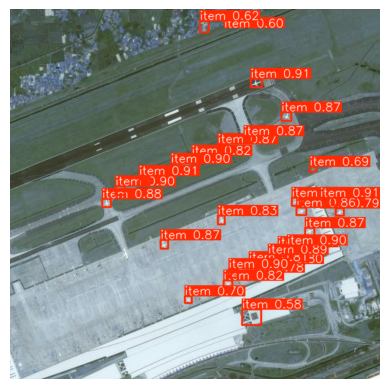


image 1/1 d:\Projects\DETAIR\aircraft_detection\YOLO_detected\test\images\29324dbf-6043-4521-bd83-44a97ffc5281_jpg.rf.94caeeb0e19ca4b7ec8f0f5200ec24c9.jpg: 1024x1024 34 items, 42.6ms
Speed: 7.9ms preprocess, 42.6ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)
29324dbf-6043-4521-bd83-44a97ffc5281_jpg.rf.94caeeb0e19ca4b7ec8f0f5200ec24c9.jpg


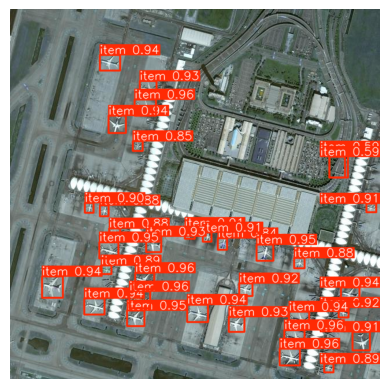


image 1/1 d:\Projects\DETAIR\aircraft_detection\YOLO_detected\test\images\58956bcc-11fc-4357-8d75-32fee9feaf07_jpg.rf.14ede6072fc674665eea263f92abba60.jpg: 1024x1024 31 items, 21.9ms
Speed: 7.0ms preprocess, 21.9ms inference, 4.8ms postprocess per image at shape (1, 3, 1024, 1024)
58956bcc-11fc-4357-8d75-32fee9feaf07_jpg.rf.14ede6072fc674665eea263f92abba60.jpg


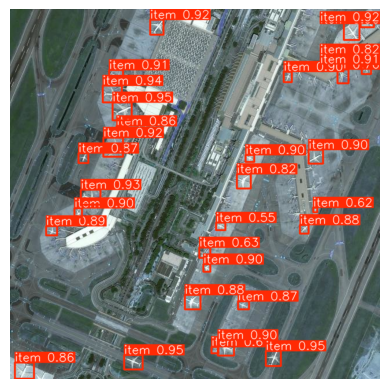


image 1/1 d:\Projects\DETAIR\aircraft_detection\YOLO_detected\test\images\7635d63c-6b97-4c9c-a7dc-27773d42ed4c_jpg.rf.7ad68d7de96b8c5dbd917a27ecf947fe.jpg: 1024x1024 35 items, 15.8ms
Speed: 6.6ms preprocess, 15.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)
7635d63c-6b97-4c9c-a7dc-27773d42ed4c_jpg.rf.7ad68d7de96b8c5dbd917a27ecf947fe.jpg


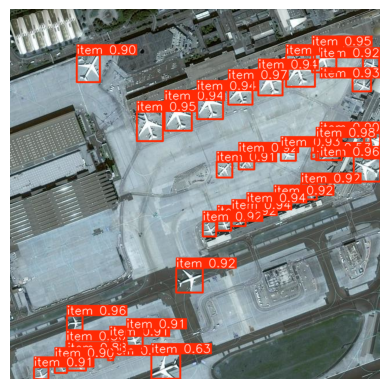


image 1/1 d:\Projects\DETAIR\aircraft_detection\YOLO_detected\test\images\90c365f8-18b6-4230-be74-cd856a1ba98f_jpg.rf.ddb3aed381797b18e246cc26e31f09ae.jpg: 1024x1024 36 items, 17.6ms
Speed: 7.4ms preprocess, 17.6ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)
90c365f8-18b6-4230-be74-cd856a1ba98f_jpg.rf.ddb3aed381797b18e246cc26e31f09ae.jpg


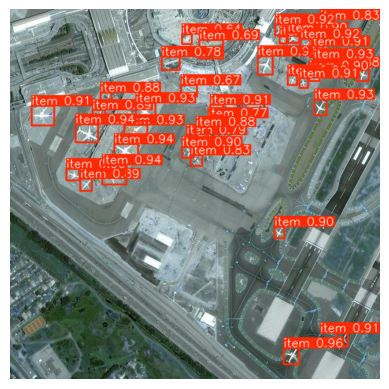

In [4]:
# Загрузка модели
model = YOLO('./models/aircraft_yolov11/weights/best.pt')

dir = './YOLO_detected/test/images'
for photo in os.listdir(dir)[:5]:
  if photo.endswith(".jpg"):
    results = model.predict(f"{dir}/{photo}", imgsz=(1024, 1024), conf=0.5)

    # Визуализация и сохранение
    print(photo)
    for r in results:
        im_array = r.plot()  # Массив numpy с разметкой
        plt.imshow(im_array)
        plt.axis('off')
        plt.show()

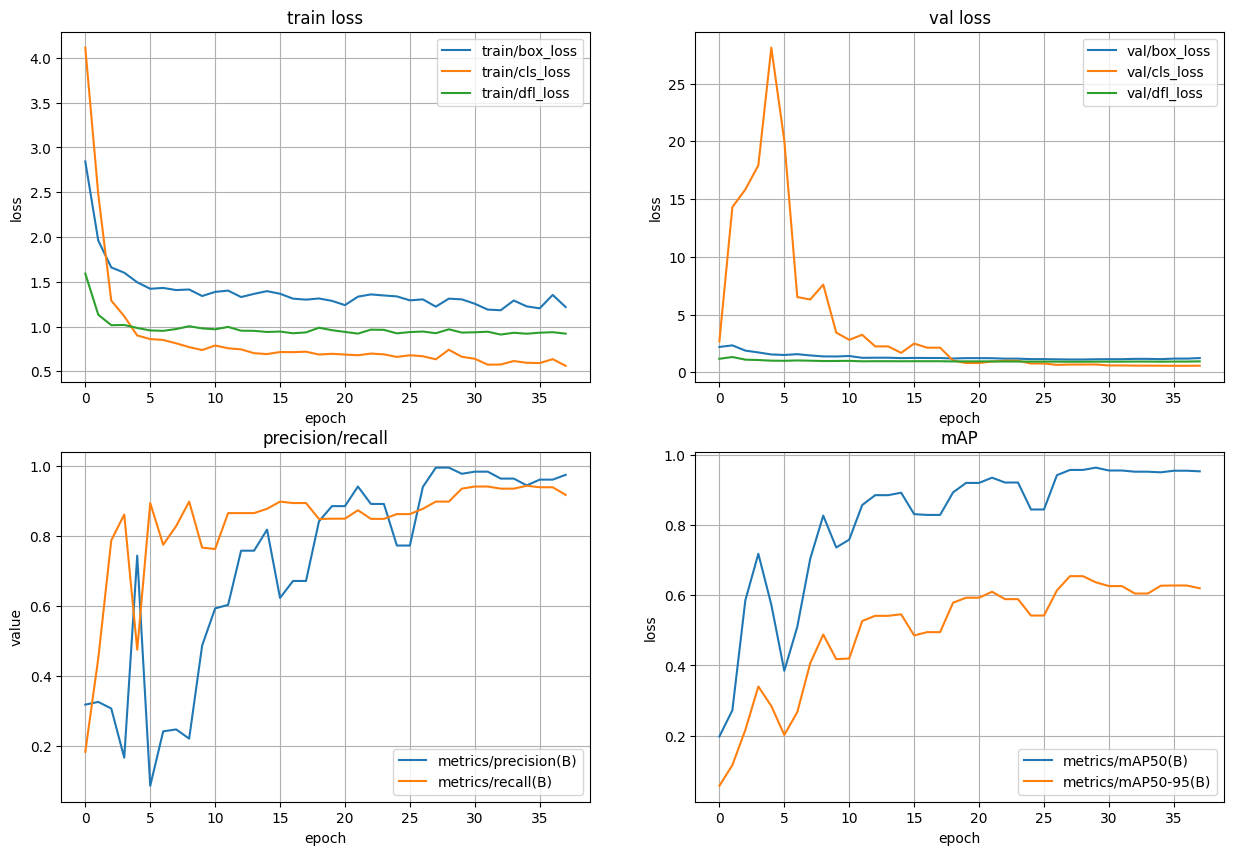

In [5]:
fig: plt.Figure
axes: typing.List[typing.List[plt.Axes]]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

results = pd.read_csv('./models/aircraft_yolov11/results.csv')

axes[0][0].plot(results.iloc[:, 2:5])
axes[0][0].legend(results.columns[2:5])
axes[0][0].set_title("train loss")
axes[0][0].set_ylabel("loss")
axes[0][0].set_xlabel("epoch")
axes[0][0].grid()


axes[0][1].plot(results.iloc[:, 9:12])
axes[0][1].legend(results.columns[9:12])
axes[0][1].set_title("val loss")
axes[0][1].set_ylabel("loss")
axes[0][1].set_xlabel("epoch")
axes[0][1].grid()


axes[1][0].plot(results.iloc[:, 5:7])
axes[1][0].legend(results.columns[5:7])
axes[1][0].set_title("precision/recall")
axes[1][0].set_ylabel("value")
axes[1][0].set_xlabel("epoch")
axes[1][0].grid()


axes[1][1].plot(results.iloc[:, 7:9])
axes[1][1].legend(results.columns[7:9])
axes[1][1].set_title("mAP")
axes[1][1].set_ylabel("loss")
axes[1][1].set_xlabel("epoch")
axes[1][1].grid()

plt.show()